In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_openpose.csv')
train.drop(columns = ['Unnamed: 0'], inplace = True)
train = train.sample(frac=1).reset_index(drop=True)
train.head(2)

,elbow-l,elbow-r,knee-l,knee-r,kneck-l,kneck-r,leg-l,leg-r,back,Pose
0,1000.000000,1000.00000,42.434996,51.547216,-40.236358,-86.241444,-37.772119,-86.583412,26.702122,warrior2
1,7.943472,163.17859,7.125016,-37.510047,98.004729,54.128032,-9.587833,-9.587833,-0.910198,halfMoon


In [3]:
train_new = train[train['elbow-l'] < 1000]
train_new = train_new[train_new['elbow-r'] < 1000]
train_new = train_new[train_new['kneck-l'] < 1000]
train_new = train_new[train_new['kneck-r'] < 1000]
train_new = train_new[train_new['knee-l'] < 1000]
train_new = train_new[train_new['knee-r'] < 1000]
train_new = train_new[train_new['leg-l'] < 1000]
train_new = train_new[train_new['leg-r'] < 1000]
train_new = train_new[train_new['back'] < 1000]
train_new.shape

(630, 10)

In [4]:
test = pd.read_csv('test_openpose.csv')
test.drop(columns = ['Unnamed: 0'], inplace = True)
test = test.sample(frac=1).reset_index(drop=True)
test.head(2)

,elbow-l,elbow-r,knee-l,knee-r,kneck-l,kneck-r,leg-l,leg-r,back,Pose
0,40.90498,-39.996080,-84.820924,69.443955,119.898902,48.503532,50.559821,-55.662358,0.000000,goddess
1,1000.00000,171.573031,1000.000000,1000.000000,63.434949,26.565051,34.230578,1000.000000,-6.146626,halfMoon


In [5]:
test_new = test[test['elbow-l'] < 1000]
test_new = test_new[test_new['elbow-r'] < 1000]
test_new = test_new[test_new['kneck-l'] < 1000]
test_new = test_new[test_new['kneck-r'] < 1000]
test_new = test_new[test_new['knee-l'] < 1000]
test_new = test_new[test_new['knee-r'] < 1000]
test_new = test_new[test_new['leg-l'] < 1000]
test_new = test_new[test_new['leg-r'] < 1000]
test_new = test_new[test_new['back'] < 1000]
test_new.shape

(292, 10)

In [6]:
train_x = train_new.iloc[:, :-1]
train_y = train_new.iloc[:, -1]
test_x = test_new.iloc[:, :-1]
test_y = test_new.iloc[:, -1]

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

sc = StandardScaler()
test_x = sc.fit_transform(test_x)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy: 0.6986301369863014
[[53  2  3  3  9]
 [ 2 15  3 14  7]
 [ 1  2 37  5  0]
 [ 1  9  4 32  5]
 [ 1  0  5 12 67]]
              precision    recall  f1-score   support

     goddess       0.91      0.76      0.83        70
    halfMoon       0.54      0.37      0.43        41
        tree       0.71      0.82      0.76        45
    triangle       0.48      0.63      0.55        51
    warrior2       0.76      0.79      0.77        85

    accuracy                           0.70       292
   macro avg       0.68      0.67      0.67       292
weighted avg       0.71      0.70      0.70       292



In [14]:
nb = []
acc = []
for i in range(20):
    nb.append(i+1)

In [15]:
from sklearn.metrics import accuracy_score

for n in nb:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_x, train_y)
    y_pred = knn.predict(test_x) 
    acc.append(accuracy_score(test_y, y_pred))

acc

[0.6986301369863014,
 0.6506849315068494,
 0.6541095890410958,
 0.6678082191780822,
 0.678082191780822,
 0.6746575342465754,
 0.6883561643835616,
 0.660958904109589,
 0.6541095890410958,
 0.6232876712328768,
 0.6164383561643836,
 0.6061643835616438,
 0.613013698630137,
 0.6061643835616438,
 0.6164383561643836,
 0.6198630136986302,
 0.6095890410958904,
 0.6164383561643836,
 0.6061643835616438,
 0.5958904109589042]

<AxesSubplot:>

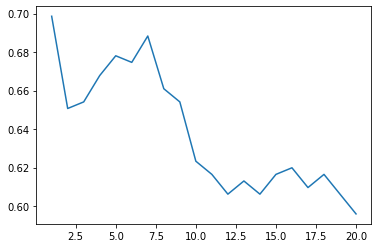

In [16]:
sns.lineplot(x = nb, y = acc)

In [23]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(train_x, train_y)
y_pred = svclassifier.predict(test_x)
print("Accuracy: ", metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy:  0.6643835616438356
[[50  0  4  5 11]
 [ 2  4  0 29  6]
 [ 0  5 33  5  2]
 [ 3  2  3 37  6]
 [ 0  2  4  9 70]]
              precision    recall  f1-score   support

     goddess       0.91      0.71      0.80        70
    halfMoon       0.31      0.10      0.15        41
        tree       0.75      0.73      0.74        45
    triangle       0.44      0.73      0.54        51
    warrior2       0.74      0.82      0.78        85

    accuracy                           0.66       292
   macro avg       0.63      0.62      0.60       292
weighted avg       0.67      0.66      0.65       292



In [24]:
kernels = ['rbf', 'poly', 'linear', 'sigmoid']
acc = []

for k in kernels:
    svclassifier = SVC(kernel=k)
    svclassifier.fit(train_x, train_y)
    y_pred = svclassifier.predict(test_x)
    acc.append(accuracy_score(test_y, y_pred))
acc

[0.6643835616438356, 0.6164383561643836, 0.565068493150685, 0.4315068493150685]

<AxesSubplot:>

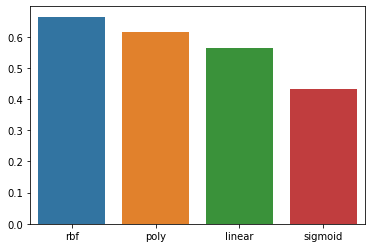

In [27]:
sns.barplot(x = kernels, y=acc)

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
train_y = np.array(train_y)
train_y = train_y.reshape(-1, 1)
train_y = ohe.fit_transform(train_y).toarray()

ohe = OneHotEncoder()
test_y = np.array(test_y)
test_y = test_y.reshape(-1, 1)
test_y = ohe.fit_transform(test_y).toarray()

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(28, input_dim=9, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

# 16,12, 5 -- 73, 64
# 16,12, 8, 5 -- 78, 64
# 20, 16,12, 8, 5 -- 85, 64.71
# 20, 20, 16,12, 8, 5 -- 92, 65.41 -- peak model for testing
# 24, 20, 20, 16,12, 8, 5 -- 97, 65.06
# after this train increases little by little but test begins to drop


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(train_x, train_y, epochs=200, batch_size=64)

Epoch 1/200
10/10 [==============================] - 0s 2ms/step - loss: 1.6236 - accuracy: 0.1524
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 1.6044 - accuracy: 0.2190
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5967 - accuracy: 0.3095
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5875 - accuracy: 0.3365
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5736 - accuracy: 0.3524
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5537 - accuracy: 0.3889
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5240 - accuracy: 0.4175
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4920 - accuracy: 0.4206
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4556 - accuracy: 0.4079
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4140 - accuracy: 0.4143
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8714
Epoch 84/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8730
Epoch 85/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8698
Epoch 86/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8714
Epoch 87/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8746
Epoch 88/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8778
Epoch 89/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8794
Epoch 90/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8778
Epoch 91/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8794
Epoch 92/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8778
Epoch 93/200


Epoch 164/200
10/10 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9190
Epoch 165/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9413
Epoch 166/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9413
Epoch 167/200
10/10 [==============================] - 0s 1ms/step - loss: 0.1796 - accuracy: 0.9413
Epoch 168/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9460
Epoch 169/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9508
Epoch 170/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9508
Epoch 171/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9524
Epoch 172/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9492
Epoch 173/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1541 - accurac

In [39]:
y_pred = model.predict(test_x)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
test = list()
for i in range(len(test_y)):
    test.append(np.argmax(test_y[i]))
    
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 66.78082191780823


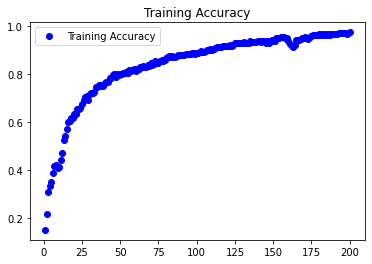

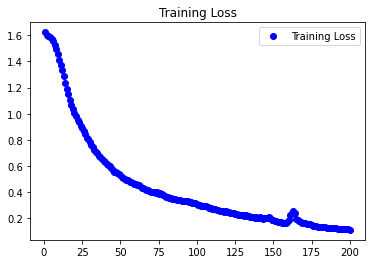

In [40]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [41]:
train = pd.read_csv('train_openpose.csv')
train.drop(columns = ['Unnamed: 0'], inplace = True)
train = train.sample(frac=1).reset_index(drop=True)
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

test = pd.read_csv('test_openpose.csv')
test.drop(columns = ['Unnamed: 0'], inplace = True)
test = test.sample(frac=1).reset_index(drop=True)
test_x = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

In [43]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=15, min_samples_leaf=5)   
clf_model.fit(train_x,train_y)
y_pred = clf_model.predict(test_x)
print("Accuracy: ", metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy:  0.5450643776824035
[[52  6 10  2 10]
 [11 35  8 23 14]
 [ 7  2 49  0 11]
 [ 8 30 11 52 16]
 [ 4 14 11 14 66]]
              precision    recall  f1-score   support

     goddess       0.63      0.65      0.64        80
    halfMoon       0.40      0.38      0.39        91
        tree       0.55      0.71      0.62        69
    triangle       0.57      0.44      0.50       117
    warrior2       0.56      0.61      0.58       109

    accuracy                           0.55       466
   macro avg       0.54      0.56      0.55       466
weighted avg       0.54      0.55      0.54       466



In [44]:
md = []
acc = []
i = 5
while i<=100:
    md.append(i)
    i = i+5
    
for m in md:
    clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=m, min_samples_leaf=5)   
    clf_model.fit(train_x,train_y)
    y_pred = clf_model.predict(test_x)
    acc.append(accuracy_score(y_pred, test_y))
acc

[0.47639484978540775,
 0.5214592274678111,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035,
 0.5450643776824035]

<AxesSubplot:>

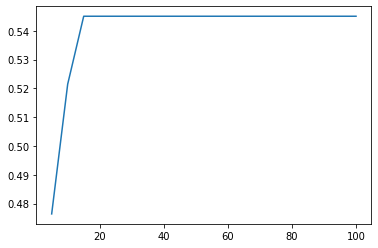

In [45]:
sns.lineplot(x = md, y = acc)

In [46]:
train = pd.read_csv('train_openpose.csv')
train.drop(columns = ['Unnamed: 0'], inplace = True)

test = pd.read_csv('test_openpose.csv')
test.drop(columns = ['Unnamed: 0'], inplace = True)

factor = pd.factorize(train['Pose'])
train.Pose = factor[0]
definitions = factor[1]

factor = pd.factorize(test['Pose'])
test.Pose = factor[0]
definitions = factor[1]

train = train.sample(frac=1).reset_index(drop=True)
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

test = test.sample(frac=1).reset_index(drop=True)
test_x = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(train_x, train_y)
y_pred = classifier.predict(test_x)
print("Accuracy: ", metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy:  0.7017167381974249
[[63  4  2  3  8]
 [ 1 38  4 35 13]
 [ 1  1 65  0  2]
 [ 2 23  8 71 13]
 [ 0  6  2 11 90]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        80
           1       0.53      0.42      0.47        91
           2       0.80      0.94      0.87        69
           3       0.59      0.61      0.60       117
           4       0.71      0.83      0.77       109

    accuracy                           0.70       466
   macro avg       0.72      0.72      0.71       466
weighted avg       0.70      0.70      0.70       466



In [50]:
ne = []
acc3 = []
i = 10
while i<=300:
    ne.append(i)
    i = i + 10

for n in ne:
    classifier = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 42)
    classifier.fit(train_x, train_y)
    y_pred = classifier.predict(test_x)
    acc3.append(accuracy_score(y_pred, test_y))
    
acc3

[0.6437768240343348,
 0.6888412017167382,
 0.7017167381974249,
 0.6909871244635193,
 0.6952789699570815,
 0.6824034334763949,
 0.6824034334763949,
 0.6909871244635193,
 0.6995708154506438,
 0.7017167381974249,
 0.7081545064377682,
 0.7081545064377682,
 0.7081545064377682,
 0.7060085836909872,
 0.703862660944206,
 0.7103004291845494,
 0.7081545064377682,
 0.7060085836909872,
 0.7060085836909872,
 0.703862660944206,
 0.7017167381974249,
 0.7081545064377682,
 0.7060085836909872,
 0.7060085836909872,
 0.7060085836909872,
 0.703862660944206,
 0.7103004291845494,
 0.7081545064377682,
 0.7103004291845494,
 0.7081545064377682]

<AxesSubplot:>

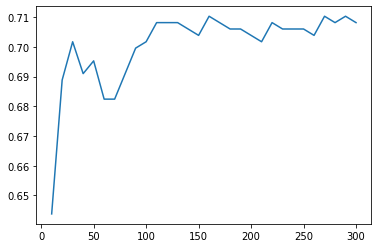

In [52]:
sns.lineplot(x = ne, y = acc3)